# Visualizing High-dimensional Parameter Relationships

This notebook demonstrates various visualizations of studies in Optuna.
The hyperparameters of a neural network trained to classify images are optimized and the resulting study is then visualized using these features.

**Note:** If a parameter contains missing values, a trial with missing values is not plotted.

# 1. Visualizing the Optimization History

In [57]:
import optuna
from optuna.visualization import plot_optimization_history

study1 = optuna.load_study(storage='sqlite:///results/rl_agent_2_cartpole.db', study_name='2025_may_01b')
study2 = optuna.load_study(storage='sqlite:///results/rl_agent_2_acrobot.db', study_name= '2023_may_02a')


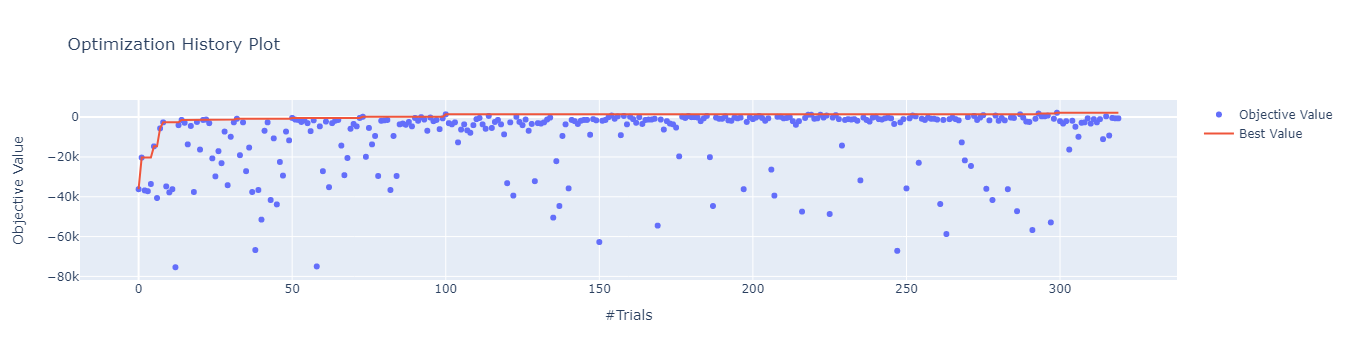

In [2]:
plot_optimization_history(study1)

In [9]:
#plot_optimization_history(study2)

## 2. Visualizing the Learning Curves of the Trials

In [29]:
from optuna.visualization import plot_intermediate_values

#plot_intermediate_values(study1)

In [30]:
#plot_intermediate_values(study2)

## 3. Visualizing High-dimensional Parameter Relationships

In [31]:
from optuna.visualization import plot_parallel_coordinate


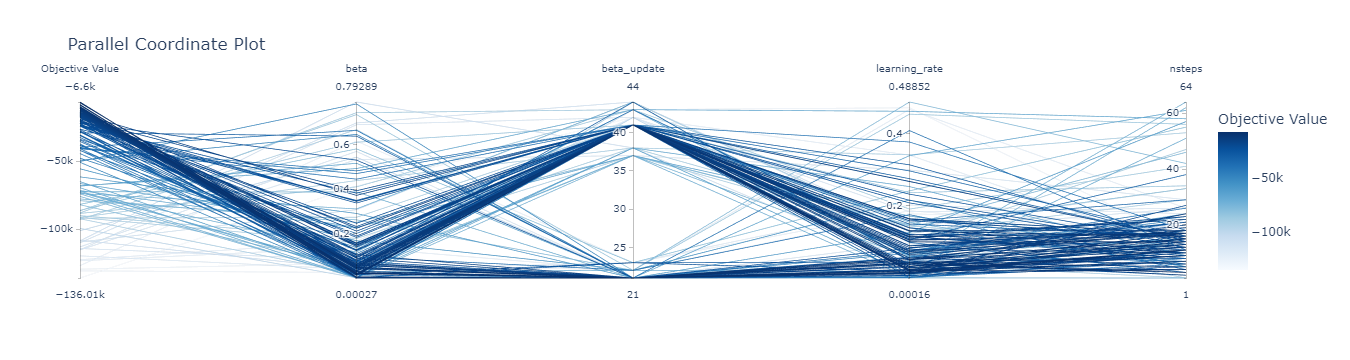

In [32]:
plot_parallel_coordinate(study1)

In [10]:
#plot_parallel_coordinate(study2)

### Selecting Parameters to Visualize

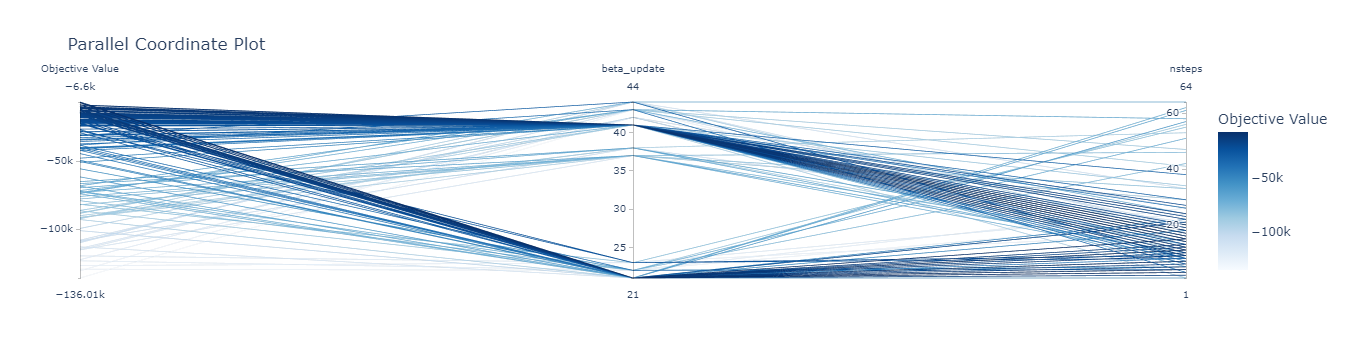

In [34]:
plot_parallel_coordinate(study1, params=['nsteps', 'beta_update'])

In [11]:
#plot_parallel_coordinate(study2, params=['nsteps', 'beta_update'])

## 4. Visualizing Hyperparameter Relationships

In [36]:
from optuna.visualization import plot_contour


### Selecting Parameters to Visualize

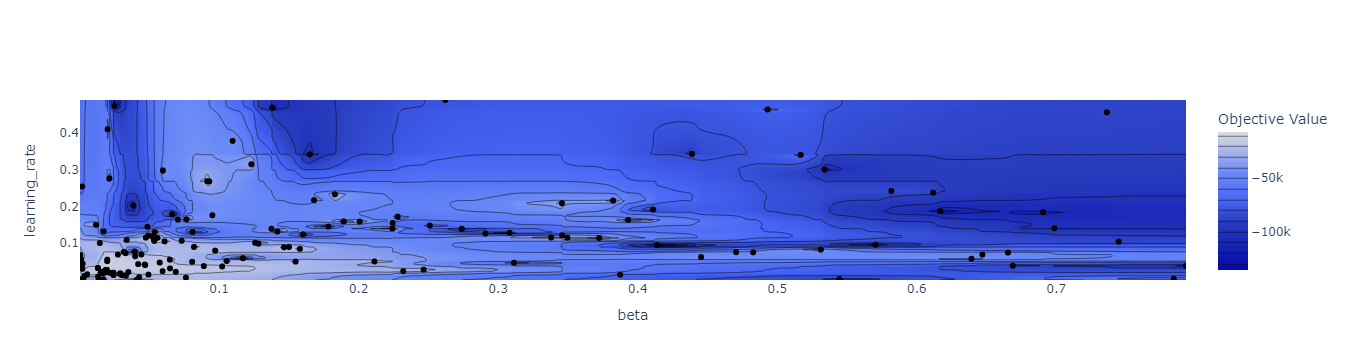

In [37]:
plot_contour(study1, params=['beta', 'learning_rate'])

In [12]:
#plot_contour(study2, params=['beta', 'learning_rate'])

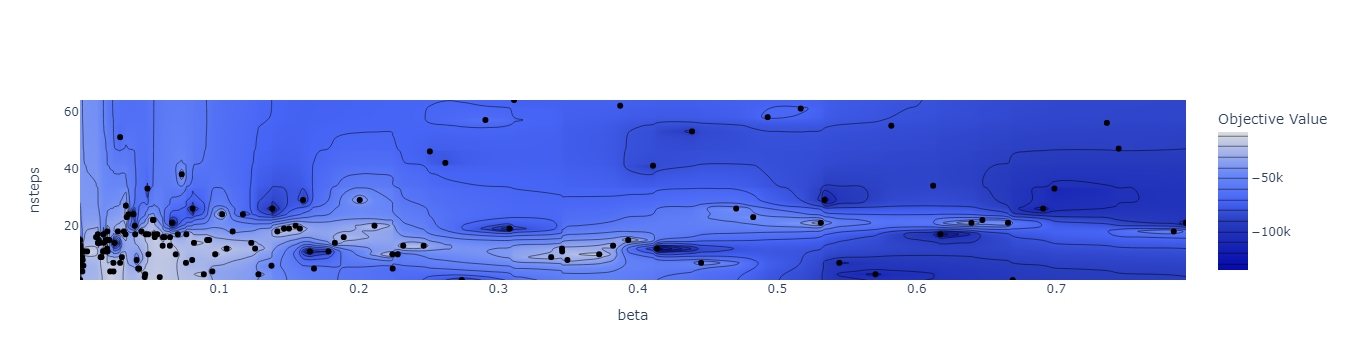

In [39]:
plot_contour(study1, params=['nsteps', 'beta'])

In [13]:
#plot_contour(study2, params=['nsteps', 'beta'])

## 5. Visualizing Individual Hyperparameters

In [41]:
from optuna.visualization import plot_slice

### Selecting Parameters to Visualize

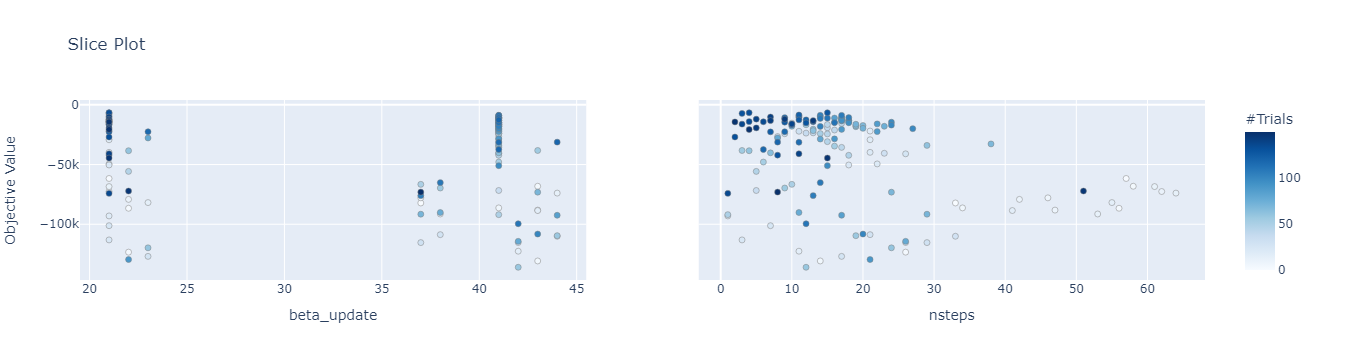

In [42]:
plot_slice(study1, params=['nsteps', 'beta_update'])

In [14]:
#plot_slice(study2, params=['nsteps', 'beta_update'])

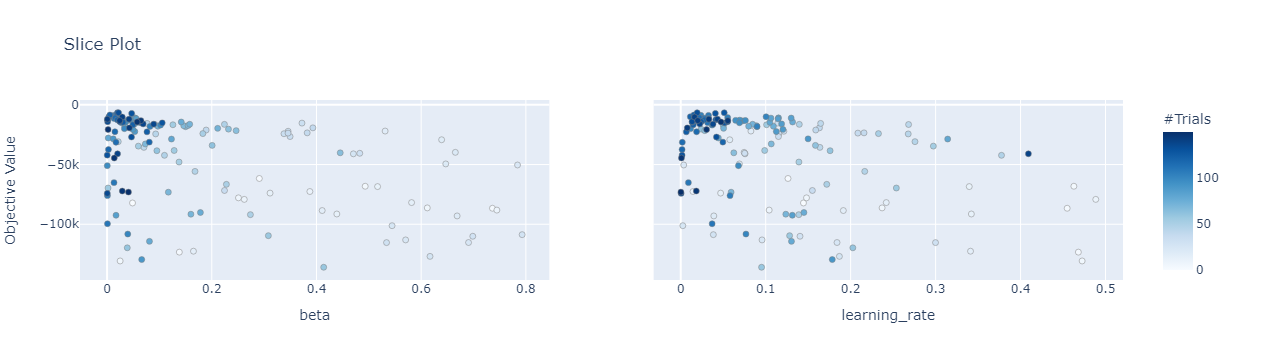

In [44]:
plot_slice(study1, params=['beta', 'learning_rate'])

In [15]:
#plot_slice(study2, params=['beta', 'learning_rate'])

In [17]:
study1.best_params

{'beta': 0.0005585238971031097,
 'beta_update': 21,
 'c_lr': 0.11445958301971863,
 'n_step': 33,
 'p_lr': 0.02580379944459975}

In [16]:
#study2.best_params

## 6. Aggregate Features

In [5]:
import pandas as pd

In [65]:
#trials = study1.get_trials()
trials = study2.get_trials()

# Initialize an empty DataFrame
data = []

for trial in trials:
    if trial.state == optuna.trial.TrialState.COMPLETE:
        # Extract the parameters (a dict) and add the objective function value
        params = trial.params
        params["objective"] = trial.value

        # Add the trial data as a new row in the DataFrame
        data.append(params)

# Create the DataFrame with the trial data
df = pd.DataFrame(data)
df

beta  beta_update      c_lr  n_step      p_lr  objective
0    0.008380           42  0.012593       6  0.007694     4016.0
1    0.002337           44  0.006905      38  0.060387    -4000.0
2    0.001370           44  0.094840      24  0.030915    -4000.0
3    0.278695           38  0.001530       3  0.007717     4517.0
4    0.088294           44  0.002220      17  0.019636    -2998.0
..        ...          ...       ...     ...       ...        ...
144  0.007229           21  0.097924       5  0.005983    11531.0
145  0.023456           44  0.165531       3  0.004919    10028.0
146  0.005579           21  0.136484       2  0.022886     3515.0
147  0.040296           21  0.084234       5  0.010850    12032.0
148  0.018323           21  0.111913       7  0.007879     6020.0

[149 rows x 6 columns]

In [59]:
# Group trials by the 'beta_update' parameter, to count, and to find the best
grouped_count = df.groupby("beta_update")['objective'].count()
grouped_idxmax = df.groupby("beta_update")['objective'].idxmax()

# A DF with the best trial for each value of 'beta_update'
best_trials = df.loc[grouped_idxmax.values]
best_trials = best_trials.reset_index(drop=True).set_index('beta_update')
#best_trials

beta      c_lr  n_step      p_lr  objective
beta_update                                                 
21           0.013500  0.169149       9  0.007603    15539.0
22           0.019321  0.095636       3  0.016810    12533.0
23           0.766073  0.075233       2  0.006924    10028.0
37           0.004169  0.097367       4  0.010536    13034.0
38           0.009254  0.074826       3  0.016841     8525.0
41           0.061037  0.100394       3  0.010067    11030.0
42           0.006452  0.090078       4  0.004786    11531.0
43           0.011005  0.183832       5  0.005076    12533.0
44           0.019655  0.137648       4  0.006764    13535.0

In [60]:
best_trials['count'] = grouped_count
best_trials

beta      c_lr  n_step      p_lr  objective  count
beta_update                                                        
21           0.013500  0.169149       9  0.007603    15539.0     66
22           0.019321  0.095636       3  0.016810    12533.0     10
23           0.766073  0.075233       2  0.006924    10028.0      6
37           0.004169  0.097367       4  0.010536    13034.0     12
38           0.009254  0.074826       3  0.016841     8525.0     10
41           0.061037  0.100394       3  0.010067    11030.0      7
42           0.006452  0.090078       4  0.004786    11531.0      8
43           0.011005  0.183832       5  0.005076    12533.0     14
44           0.019655  0.137648       4  0.006764    13535.0     16

<AxesSubplot:xlabel='beta_update'>

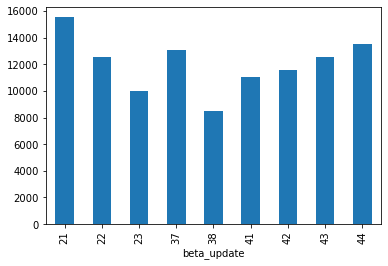

In [61]:
best_trials['objective'].plot.bar()

In [63]:
# Calculate min and max per column
min_values = best_trials.min()
max_values = best_trials.max()

# Combine min and max values into a single DataFrame
stats = pd.DataFrame({"min": min_values, "max": max_values})

# Display the statistics
stats

min           max
beta          0.004169      0.766073
c_lr          0.074826      0.183832
n_step        2.000000      9.000000
p_lr          0.004786      0.016841
objective  8525.000000  15539.000000
count         6.000000     66.000000

count         mean  median     min      max          std
beta_update                                                          
21              66  8031.590909  8775.5 -4000.0  15539.0  4736.212388
22              10  1060.100000  -242.5 -4000.0  12533.0  5449.678532
23               6  2763.500000  2012.0 -4000.0  10028.0  6764.427714
37              12  3932.500000  5769.5 -4000.0  13034.0  6112.996371
38              10  3665.300000  4016.0 -4000.0   8525.0  3859.470806
41               7  6163.142857  7022.0 -4000.0  11030.0  5015.960740
42               8  2513.000000  1511.0 -4000.0  11531.0  6432.675005
43              14  4946.428571  6521.0 -4000.0  12533.0  5406.148917
44              16  4016.000000  4266.5 -4000.0  13535.0  5950.451613

<AxesSubplot:xlabel='beta_update'>

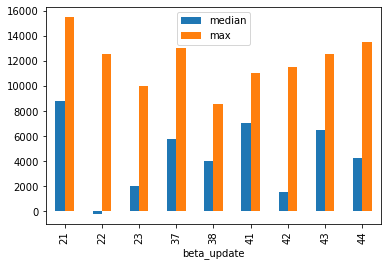

In [66]:
df1 = df.groupby('beta_update')['objective'].agg(["count", "mean", "median", "min", "max", "std"])
display(df1)

# quanto mais para CIMA, melhor!
df1[['median', 'max']].plot.bar()